### Load libraries

In [1]:
import pandas as pd
import wandb
import wandb.sdk

import matplotlib.pyplot as plt

### Load data

In [2]:
api = wandb.Api()
runs: list[wandb.sdk.wandb_run.Run] = api.runs(
    f"data-frugal-learning/adv-train",
    filters={"tags": {"$in": ["try1.2", "try1.2.1"]}},
)


def flatten_dict(d: dict, prefix: str = "") -> dict:
    ret = dict()
    for k, v in d.items():
        if isinstance(v, dict):
            ret |= flatten_dict(v, prefix=f"{k}_")
        else:
            ret[f"{prefix}{k}"] = v
    return ret


df = pd.DataFrame(
    [
        flatten_dict(r.summary._json_dict)  # type: ignore
        | {"name": r.name}
        | flatten_dict(r.config)
        for r in runs
    ]
)
df.columns


Index(['test_acc_adv', 'test_loss_nat', 'test_orig_acc_nat',
       'train_orig_loss_nat', 'val_loss_min', '_wandb_runtime',
       'val_acc_nat_max', 'test_acc_nat', 'val_loss_adv_min', 'test_orig_acc',
       'train_loss_adv_min', 'test_orig_loss_adv', 'epoch', 'test_loss_adv',
       '_step', 'train_acc_max', '_timestamp', 'train_loss_min',
       'val_acc_adv_max', 'train_orig_acc', 'best_checkpoint_steps', 'lr',
       'val_loss_nat_min', 'train_acc_adv_max', 'train_orig_loss',
       'train_orig_acc_adv', 'val_acc_max', 'test_acc', '_runtime',
       'train_acc_nat_max', 'test_orig_loss', 'test_orig_acc_adv',
       'test_orig_loss_nat', 'train_orig_loss_adv', 'step',
       'train_loss_nat_min', 'train_orig_acc_nat', 'test_loss', 'name', 'seed',
       'tags', 'depth', 'width', 'min_lr', 'adv_eps', 'n_train', 'pgd_steps',
       'batch_size', 'model_type', 'weight_decay', 'do_adv_training',
       'eval_batch_size', 'samples_per_eval', 'n_imgs_to_log_per_eval',
       'lr_decay_

In [3]:
print(sorted(df.n_train.unique()))

[50, 80, 100, 200, 300, 500, 1000, 2000, 5000, 10000, 20000, 50000, 200000, 500000, 2000000, 5942688]


### Plots

In [4]:
adv_df = df[df.do_adv_training]

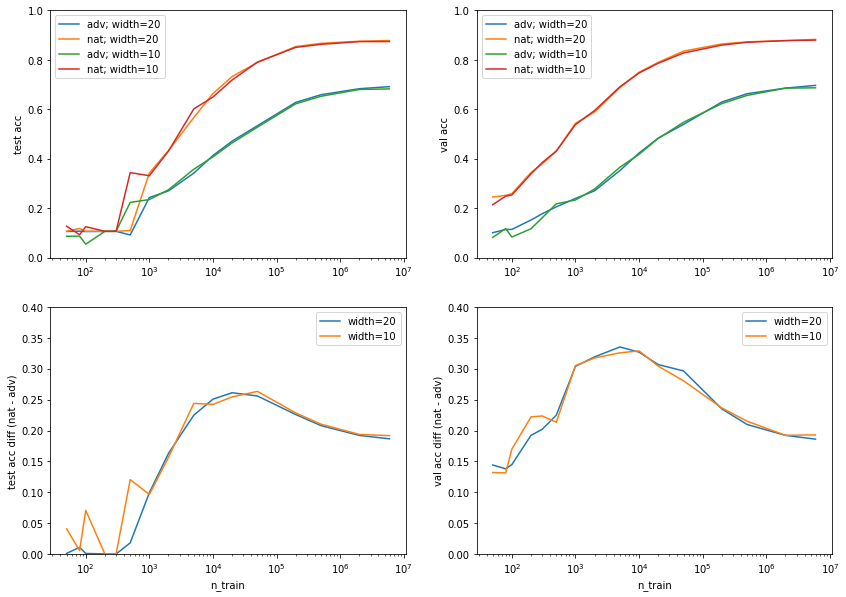

In [5]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.test_acc_adv, label=f"adv; {width=}")
    plt.plot(cdf.n_train, cdf.test_acc_nat, label=f"nat; {width=}")
plt.ylim(0, 1)
plt.xscale("log")
plt.ylabel("test acc")
plt.legend()

plt.subplot(2, 2, 3)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.test_acc_nat - cdf.test_acc_adv, label=f"{width=}")
plt.ylim(0, 0.4)
plt.xscale("log")
plt.xlabel("n_train")
plt.ylabel("test acc diff (nat - adv)")
plt.legend()

plt.subplot(2, 2, 2)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.val_acc_adv_max, label=f"adv; {width=}")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max, label=f"nat; {width=}")
plt.ylim(0, 1)
plt.xscale("log")
plt.ylabel("val acc")
plt.legend()

plt.subplot(2, 2, 4)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max - cdf.val_acc_adv_max, label=f"{width=}")
plt.ylim(0, 0.4)
plt.xscale("log")
plt.xlabel("n_train")
plt.ylabel("val acc diff (nat - adv)")
plt.legend();


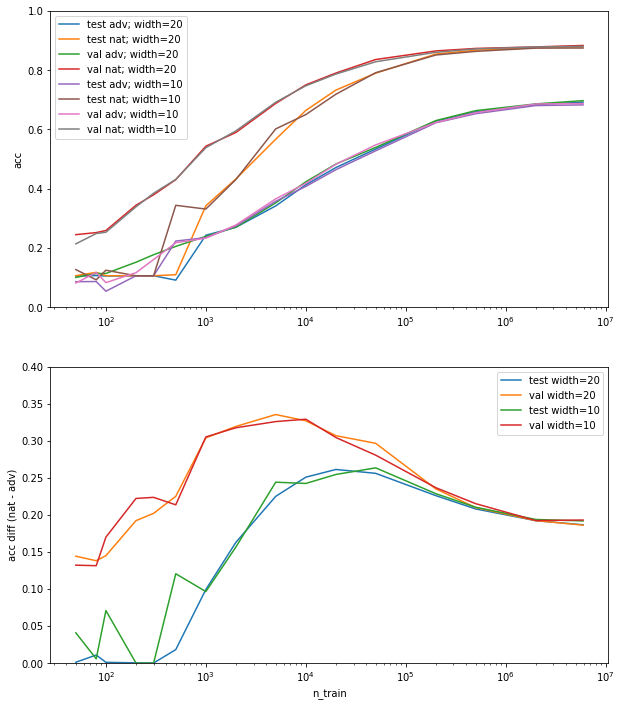

In [6]:
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")

    plt.plot(cdf.n_train, cdf.test_acc_adv, label=f"test adv; {width=}")
    plt.plot(cdf.n_train, cdf.test_acc_nat, label=f"test nat; {width=}")

    plt.plot(cdf.n_train, cdf.val_acc_adv_max, label=f"val adv; {width=}")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max, label=f"val nat; {width=}")
plt.ylim(0, 1)
plt.xscale("log")
plt.ylabel("acc")
plt.legend()

plt.subplot(2, 1, 2)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.test_acc_nat - cdf.test_acc_adv, label=f"test {width=}")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max - cdf.val_acc_adv_max, label=f"val {width=}")
plt.ylim(0, 0.4)
plt.xscale("log")
plt.xlabel("n_train")
plt.ylabel("acc diff (nat - adv)")
plt.legend();